#                                 All Classification and Clustering  Algorithams on iris dataset


Date:27.03.2019
    
Duration: 3 days
    
Dataset Name: Iris Dataset
    
Done by: Pulijala Sandeep

In [1]:
#steps need to fallow

# understand bussiness requirement

# read the data(csv or database or etc)

# data preprocessing(cleaning)

# EDA

# fitting algoritham( take optimum parameters )

# feature selection(improving the model)

# feature engineering(if required)(improving the model)

# visualisation(if required)

# final report

# All classification Algorithams on Iris dataset

In [4]:
#IMPORT THE PACKAGES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [5]:
#Reading data from CSV file
dataset= pd.read_csv("C:\\Users\\HP\\Desktop\\ML DATASETS\\iris.csv",encoding='UTF-8')

In [6]:
pp.ProfileReport(dataset)

Number of variables,5
Number of observations,150
Total Missing (%),0.1%
Total size in memory,5.9 KiB
Average record size in memory,40.5 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [7]:
################################  Data Preprocessing ############################

In [8]:
#find type
print(dataset.dtypes)
# find categorical variables
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
# find numerical variables
numerical = [var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))
# view of categorical variables
print(dataset[categorical].head())
# view of numerical variables
print(dataset[numerical].head())

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
There are 1 categorical variables
There are 4 numerical variables
  species
0  setosa
1  setosa
2  setosa
3  setosa
4  setosa
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           NaN          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [220]:
print(dataset.head())
print(dataset.shape)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           NaN          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
(150, 5)


In [221]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,150.000000,150.000000,150.000000
mean,5.849664,3.054000,3.758667,1.198667
std,0.827208,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [222]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    149 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [223]:
dataset.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [224]:
#check missing values
dataset.isna().sum()

sepal_length    1
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [225]:
#replace missing values by median/mode/mean
# dataset["species"].fillna(dataset["species"].mode(), inplace=True)
# dataset["species"].fillna("setosa")
dataset["sepal_length"].fillna(dataset["sepal_length"].median(skipna=True), inplace=True)

In [226]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [235]:
#Defining data and label
X=dataset.iloc[:,0:4]
y=dataset.iloc[:,4]

In [ ]:
#if you are finding any difficult, while exectiong,give label values to your dependent variable(y)

In [228]:
#Split data into training and test datasets (training will be based on 70% of data)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
#test_size: if integer, number of examples into test dataset; if between 0.0 and 1.0, means proportion
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 105 samples in the training set and 45 samples in the test set


In [205]:
# Feature Scaling
#for svc and logistic regression and gradient boost and sgd algoritham scaling required and for remaining not required(will give same results if you use scale also)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [206]:
######################################3   EDA   ########################################33

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


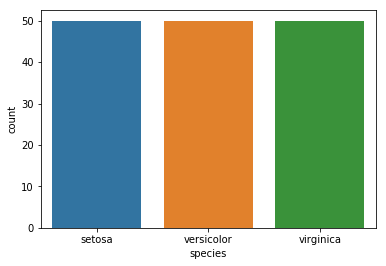

In [45]:
#value counts
print(y.value_counts())
sns.countplot(y)

In [236]:
#Before executing Pearson Correlation Coefficient give label for species
# from sklearn.preprocessing import LabelEncoder
# label=LabelEncoder()
# y=label.fit_transform(y)
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataset['petal_width'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.9564638238016173  with a P-value of P = 4.775002368756619e-81


In [237]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataset['petal_length'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is 0.9490425448523336  with a P-value of P = 4.1554775794971695e-76


In [238]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataset['sepal_width'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is -0.4194462002600275  with a P-value of P = 9.159984972550002e-08


In [239]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataset['sepal_length'], y)
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)


The Pearson Correlation Coefficient is nan  with a P-value of P = 1.0


c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:5256: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


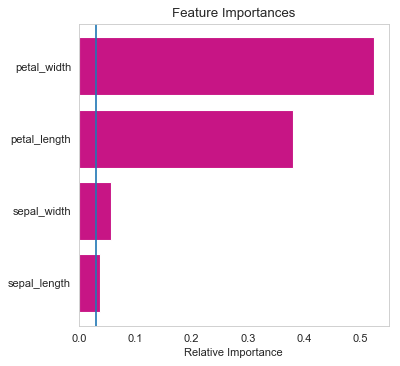

In [230]:
#Feature selection
#don't applly scaling when you are executing these 
#from sklearn.ensemble import RandomForestClassifier
#clf4=RandomForestClassifier()
#clf4.fit(X_train,y_train)
def plot_feature_importances(importances, features):
    # get the importance rating of each feature and sort it
    indices = np.argsort(importances)

    # make a plot with the feature importance
    plt.figure(figsize=(5,5), dpi= 80, facecolor='w', edgecolor='k')
    plt.grid()
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], height=0.8, color='mediumvioletred', align='center')
    plt.axvline(x=0.03)
    plt.yticks(range(len(indices)), list(X_train))
    plt.xlabel('Relative Importance')
    plt.show()
plot_feature_importances(clf4.feature_importances_, X_train)

so from the figure as well as from the pearson coefficiant and p value we can conclude,the feature importance

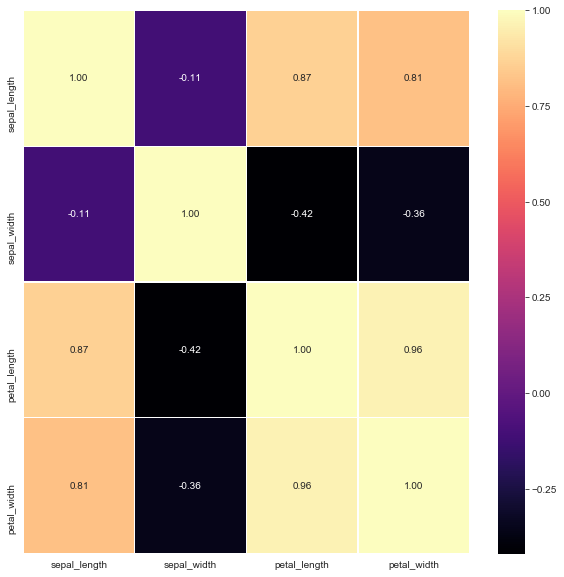

In [212]:
#plot correlation [plot]
#if you give label to y,then it also present in the plot
fig,ax = plt.subplots(figsize=(10,10))
sns.heatmap(dataset.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


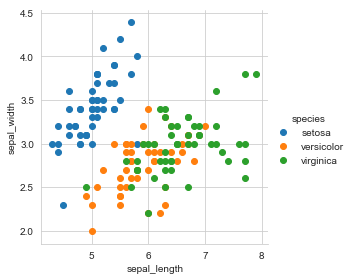

In [46]:
# 2-D Scatter plot . 
sns.set_style("whitegrid");
sns.FacetGrid(dataset, hue="species", size=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


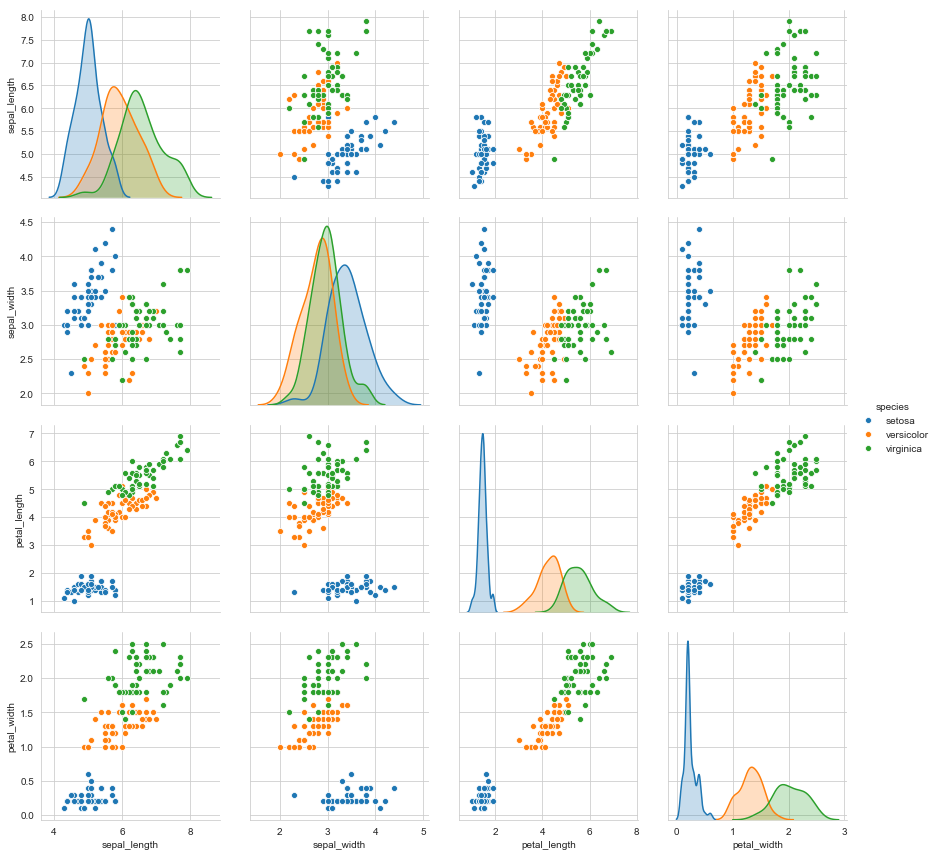

In [47]:
# pairwise scatter plot: Pair-Plot
plt.close();
sns.set_style("whitegrid");
sns.pairplot(dataset, hue="species", size=3);
plt.show()

from these pair plot,you can compare ,how your  dependent variables are plotting w.r.t  dependent variable

In [48]:
iris_setosa = dataset.loc[dataset["species"] == "setosa"];
iris_virginica = dataset.loc[dataset["species"] == "virginica"];
iris_versicolor = dataset.loc[dataset["species"] == "versicolor"];

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


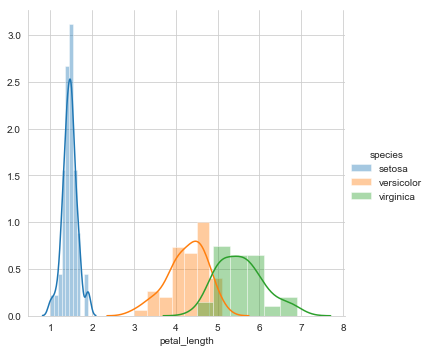

In [52]:
#Histogram
sns.FacetGrid(dataset, hue="species", size=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();
#########  Homework #################
##################### do for all petal width,sepal length ,sepal width ####################

 -> write the points,what you underastand from the  PDF
 
 1) petal length of setosa flower is in b/w 1 to 2cm
 
 2) petal length of versicolor  flower is in b/w 2.5 to 5.5cm
 
 3) petal length of verginica  flower is in b/w 3.8 to 7.8cm
 

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


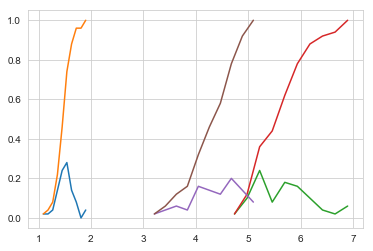

In [53]:
# Plots of CDF of petal_length for various types of flowers.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();
#########  Homework #################
##################### do for all petal width,sepal length ,sepal width ####################


 -> write the points,what you underastand from the  CDF
 
 1) 80% of petal length of setosa flower is 1.5
 
 2) 80% of petal length of verginica flower is 4.8
 
 3) 80% of petal length of versicolor flower is 6

In [54]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))


Means:
1.464
5.5520000000000005
4.26

Std-dev:
0.17176728442867112
0.546347874526844
0.4651881339845203


In [55]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


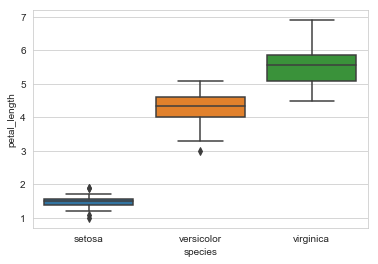

In [56]:
#Boxplot
sns.boxplot(x='species',y='petal_length', data=dataset)
plt.show()
#check are you finding any outlierrs

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

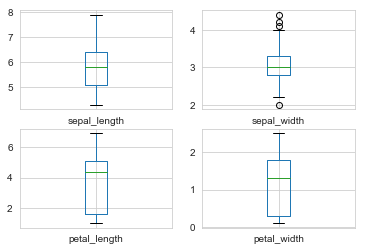

In [60]:
# box and whisker plot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


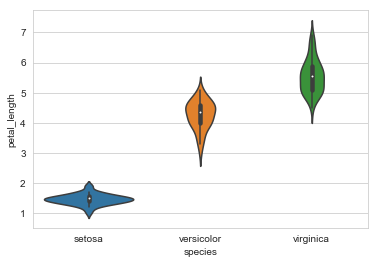

In [57]:
# A violin plot combines the benefits of box plot and pdf 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=dataset, size=8)
plt.show()

In [ ]:
####################  Fitting Algoritham ##############################3

In [62]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf=DecisionTreeClassifier(random_state=123)
clf.fit(X_train,y_train)
y_pred_1=clf.predict(X_test)
y_pred_2=clf.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


****** report on test data********************************
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

****** report on train  data********************************
1.0
[[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      1.00      1.00        32
   virginica       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [63]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf4=RandomForestClassifier(random_state=124)
clf4.fit(X_train,y_train)
y_pred_1=clf4.predict(X_test)
y_pred_2=clf4.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))



****** report on test data********************************
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

****** report on train  data********************************
1.0
[[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      1.00      1.00        32
   virginica       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [64]:
# SVC
from sklearn.svm import SVC
clf1=SVC(random_state=1)
clf1.fit(X_train,y_train)
#Prediction
y_pred_1=clf1.predict(X_test)
y_pred_2=clf1.predict(X_train)

print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

****** report on train  data********************************
0.9714285714285714
[[34  0  0]
 [ 0 31  2]
 [ 0  1 37]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.97      0.94      0.95        33
   virginica       0.95      0.97      0.96        38

   micro avg       0.97      0.97      0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [65]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
lg_reg=LogisticRegression(random_state=12)
lg_reg.fit(X_train,y_train)
#Prediction
y_pred_1=lg_reg.predict(X_test)
y_pred_2=lg_reg.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.8222222222222222
[[16  0  0]
 [ 0 11  1]
 [ 0  7 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.61      0.92      0.73        12
   virginica       0.91      0.59      0.71        17

   micro avg       0.82      0.82      0.82        45
   macro avg       0.84      0.83      0.82        45
weighted avg       0.86      0.82      0.82        45

****** report on train  data********************************
0.9142857142857143
[[34  0  0]
 [ 0 25  2]
 [ 0  7 37]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.78      0.93      0.85        27
   virginica       0.95      0.84      0.89        44

   micro avg       0.91      0.91      0.91       105
   macro avg       0.91      0.92      0.91       105
weighted avg       0.92      0.91      0.92       105



c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [66]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(random_state=23)
gbc.fit(X_train,y_train)
#Prediction
y_pred_1 =gbc.predict(X_test)
y_pred_2 = gbc.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


****** report on test data********************************
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

****** report on train  data********************************
1.0
[[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      1.00      1.00        32
   virginica       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [67]:
#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model.fit(X_train,y_train)
#Prediction
y_pred_1 =model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


****** report on test data********************************
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

****** report on train  data********************************
1.0
[[34  0  0]
 [ 0 32  0]
 [ 0  0 39]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      1.00      1.00        32
   virginica       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [68]:
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bac= BaggingClassifier(random_state=13)
bac.fit(X_train,y_train)
#Prediction
y_pred_1 =bac.predict(X_test)
y_pred_2 = bac.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

****** report on train  data********************************
0.9904761904761905
[[34  0  0]
 [ 0 32  1]
 [ 0  0 38]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       1.00      0.97      0.98        33
   virginica       0.97      1.00      0.99        38

   micro avg       0.99      0.99      0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



In [ ]:
#before executing install do__  #pip3 install xgboost
#XGBoostClassifier
from xgboost import XGBoostClassifier
model= XGBClassifier(random_state=13)
model.fit(X_train,y_train)
#Prediction
y_pred_1=model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

In [69]:
#GaussianNB
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))



****** report on test data********************************
1.0
[[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      1.00      1.00        18
   virginica       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

****** report on train  data********************************
0.9428571428571428
[[34  0  0]
 [ 0 29  3]
 [ 0  3 36]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.91      0.91      0.91        32
   virginica       0.92      0.92      0.92        39

   micro avg       0.94      0.94      0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105



In [ ]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))
##################for mutinomial naive bayes independent variablees must be non negative#####################

In [73]:
print(X["sepal_length"].min())
print(X["sepal_width"].min())
print(X["petal_length"].min())
print(X["petal_width"].min())

4.3
2.0
1.0
0.1


In [74]:
#AdaBoostClassifier
from sklearn.ensemble import  AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))


****** report on test data********************************
0.9111111111111111
[[16  0  0]
 [ 0 17  3]
 [ 0  1  8]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      0.85      0.89        20
   virginica       0.73      0.89      0.80         9

   micro avg       0.91      0.91      0.91        45
   macro avg       0.89      0.91      0.90        45
weighted avg       0.92      0.91      0.91        45

****** report on train  data********************************
0.9619047619047619
[[34  0  0]
 [ 0 31  3]
 [ 0  1 36]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.97      0.91      0.94        34
   virginica       0.92      0.97      0.95        37

   micro avg       0.96      0.96      0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [75]:
#LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

****** report on train  data********************************
0.9809523809523809
[[34  0  0]
 [ 0 31  1]
 [ 0  1 38]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.97      0.97      0.97        32
   virginica       0.97      0.97      0.97        39

   micro avg       0.98      0.98      0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [76]:
#QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model=QuadraticDiscriminantAnalysis()
model.fit(X_train,y_train)
#Prediction
y_pred_1 = model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

****** report on train  data********************************
0.9904761904761905
[[34  0  0]
 [ 0 31  0]
 [ 0  1 39]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.97      1.00      0.98        31
   virginica       1.00      0.97      0.99        40

   micro avg       0.99      0.99      0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105



In [77]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
#Prediction
y_pred_1=model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))



****** report on test data********************************
0.9777777777777777
[[16  0  0]
 [ 0 17  0]
 [ 0  1 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.92      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45

****** report on train  data********************************
0.9714285714285714
[[34  0  0]
 [ 0 31  2]
 [ 0  1 37]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        34
  versicolor       0.97      0.94      0.95        33
   virginica       0.95      0.97      0.96        38

   micro avg       0.97      0.97      0.97       105
   macro avg       0.97      0.97      0.97       105
weighted avg       0.97      0.97      0.97       105



In [78]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
model = SGDClassifier()
model.fit(X_train,y_train)
#Prediction
y_pred_1=model.predict(X_test)
y_pred_2 = model.predict(X_train)
print("****** report on test data********************************")
print(accuracy_score(y_pred_1,y_test))
print(confusion_matrix(y_pred_1,y_test))
print(classification_report(y_pred_1,y_test))
print("****** report on train  data********************************")
print(accuracy_score(y_pred_2,y_train))
print(confusion_matrix(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

****** report on test data********************************
0.8
[[16  0  0]
 [ 0 10  1]
 [ 0  8 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.56      0.91      0.69        11
   virginica       0.91      0.56      0.69        18

   micro avg       0.80      0.80      0.80        45
   macro avg       0.82      0.82      0.79        45
weighted avg       0.85      0.80      0.80        45

****** report on train  data********************************
0.8857142857142857
[[33  0  0]
 [ 1 23  2]
 [ 0  9 37]]
              precision    recall  f1-score   support

      setosa       0.97      1.00      0.99        33
  versicolor       0.72      0.88      0.79        26
   virginica       0.95      0.80      0.87        46

   micro avg       0.89      0.89      0.89       105
   macro avg       0.88      0.90      0.88       105
weighted avg       0.90      0.89      0.89       105



c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [80]:
##################################### Visualising the results  #################################

## I classified my independent variables based on dependent variables using Logistic regression  ##

In [190]:
# import some data to play with
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target


logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)



LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=None, penalty='l2',
          random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
          warm_start=False)

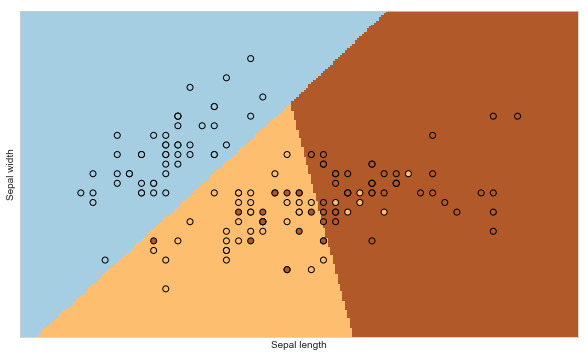

In [191]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

observations: 
____________ from the plot ,we can say that setosa flower  classified correctly based on sepal length and sepal width ,
    
                but my versicolor and verginica classified but not that much(merged)
    
Homework 
__________ Try to improve it by using different algorirhms

In [111]:
##### ################## Bonus : Dimensionality reduction  #################################

In [ ]:
#I reduced my four dimension to 2 dimension by using pca
#Home work _  try it on lda and kernel pca and tsne

In [157]:
# Importing the dataset
dataset = pd.read_csv('C:\\Users\\HP\\Desktop\\ML DATASETS\\iris.csv')
dataset["sepal_length"].fillna(dataset["sepal_length"].median(skipna=True), inplace=True)
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
y=label.fit_transform(y)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [159]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [161]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 2)
(30, 2)
(120,)
(30,)


In [162]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [163]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred_2=classifier.predict(X_train)

0.8333333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.62      1.00      0.76         8
           2       1.00      0.55      0.71        11

   micro avg       0.83      0.83      0.83        30
   macro avg       0.87      0.85      0.82        30
weighted avg       0.90      0.83      0.83        30



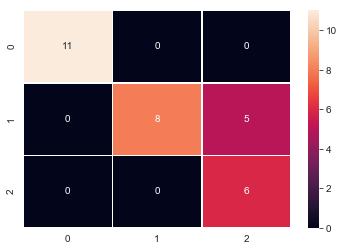

In [164]:
# Making the Classification report on test data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,linewidths=.5)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

In [165]:
y_pred_2.shape

(120,)

0.8666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.65      0.89      0.75        27
           2       0.93      0.76      0.84        54

   micro avg       0.87      0.87      0.87       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.89      0.87      0.87       120



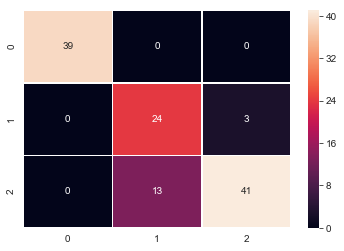

In [166]:
# Making the Classification report on train data
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_2,y_train)
sns.heatmap(cm,annot=True,linewidths=.5)
print(accuracy_score(y_pred_2,y_train))
print(classification_report(y_pred_2,y_train))

In [167]:
y_train

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


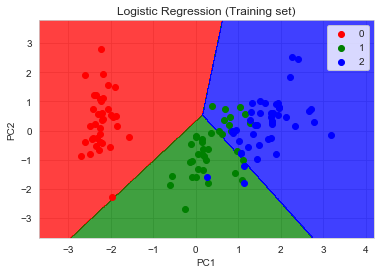

In [168]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


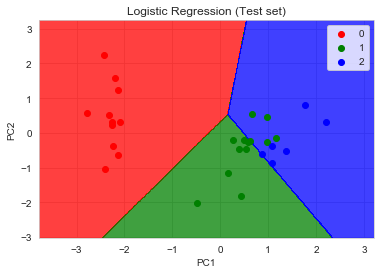

In [169]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

REPORT :
-------------
Decision tree classifer: Accuracy on Test  and  Train data : 0.97 and 1

Random Forest classifer: Accuracy on Test  and  Train data : 0.97 and 1

SVC classifer: Accuracy on Test  and  Train data : 0.97 and 0.97

Logistic Regression : Accuracy on Test  and  Train data : 0.82 and 0.87

Gradient boost classifer: Accuracy on Test  and  Train data : 0.97 and 1

Extra tree classifer: Accuracy on Test  and  Train data : 0.97 and 1

Bagging classifer: Accuracy on Test  and  Train data : 0.97 and 0.99

Gaussian naive bays classifer: Accuracy on Test  and  Train data : 1 and 0.94

ADA boost classifer: Accuracy on Test  and  Train data : 0.91 and 0.95

Linear discremenent analysis: Accuracy on Test  and  Train data : 0.97 and 0.98

Quadratic  discremenent analysis: Accuracy on Test  and  Train data : 0.97 and 0.99

KNN classifer: Accuracy on Test  and  Train data : 0.97 and 0.97

Stochastic gradient decent classifer: Accuracy on Test  and  Train data : 0.8 and 0.88

XG Boost classifer: Accuracy on Test  and  Train data : (pip install XGboost)

Multinomial naive bays classifer: Accuracy on Test  and  Train data : (non positive error solve it)


#feature selection

your petal width showing more impact on your species

and then petal length

and then sepal width

and then sepal length

#                                 All CLUSTERING Algorithams on iris dataset

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [241]:
#Reading data from CSV file
data= pd.read_csv("C:\\Users\\HP\\Desktop\\ML DATASETS\\iris.csv")

In [247]:
#Defining data and label
X=data.iloc[:,0:4].values
#y_iris=data.iloc[:,4]
data["sepal_length"].fillna(data["sepal_length"].median(skipna=True), inplace=True)

In [248]:
#*************************K_MEANS CLUSTERING*************************************************888

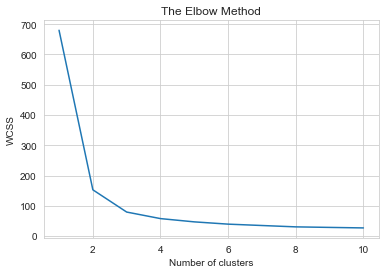

In [249]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [250]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [251]:
from sklearn.metrics import accuracy_score
accuracy_score(y_kmeans,kmeans.labels_)

1.0

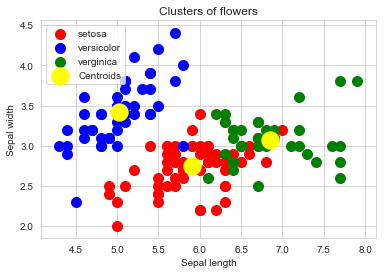

In [252]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'verginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of flowers')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [253]:
#******************END OF K_MEANS*************************************

In [254]:
#*********************Hierarchy Clustering*********************************

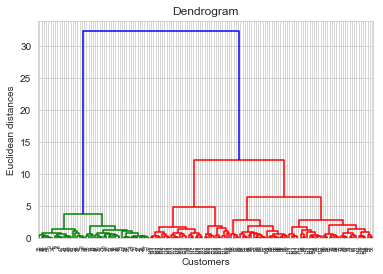

In [255]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [256]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

In [257]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hc,hc.labels_)

1.0

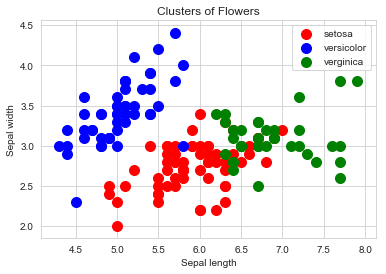

In [258]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'setosa')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'versicolor')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'verginica')
plt.title('Clusters of Flowers')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

In [259]:
#*********************End of Hierarchy Clustering*********

In [ ]:
#finally if you are finding any mistakes, rectify those

In [1]:
#****************************  Thank You  **************************************88